# Task-7 : Stock Market Prediction using Numerical and Textual Analysis
                (Level - Advanced)

## The spark Foundation: Graduate Rotational Internship Program

## Data Science and Bussiness Analytics Intern
Author : Nikita Kumbhar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

df=pd.read_csv(r'C:\Users\admin\Downloads\yahoo_stock.csv')

In [2]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

As the date column is wrongly set as object type, let's change it to Datetime type:

### Data Exploration and evaluation of Stationarity.

In [3]:
df.Date.min(),df.Date.max()

('2015-11-23', '2020-11-20')

Let's compute the amount of days between the limits in the table, i.e. 2020-11-20/2015-11-23, take into account that the result will give us the days-1:

In [ ]:
df.set_index('Date',inplace=True)

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


Let's plot four of the indicators in the table and differentiate their corresponding curves by colours.

<AxesSubplot:>

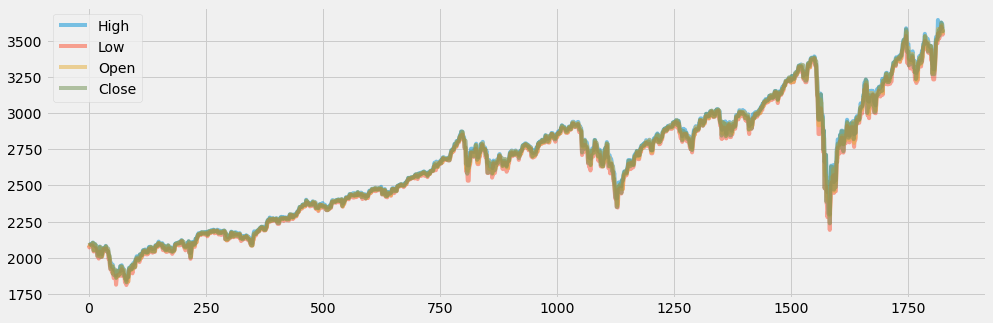

In [6]:
df[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

The four had almost same behaviour troughout time and based on this assumption in this project we will only focus on one of them 'High' in order to build a model which could predict future values and then as possible suggestions extrapolate such model to other indicators.  
Firstly, we will demonstrate if the time-series problem corresponds to a Non-Stationary type, which characterizes for having:  
- Non-constant variance.  
- Non-constant mean.  
- Seasonality.  
- High autocorrelation. 

There are four well known ways to evaluate if the serie meets the criteria just mentioned, these corresponds to:  
- Sequence visualization.
- Histogram, Autocorrelation and Partial Aurocorrelation plots.
- Statistical summary of chunks.
- Adfuller test.



# Evaluating Stationarity:

The following histogram plot should have a uniform distribution meaning non-constant mean or 'trend':

<AxesSubplot:>

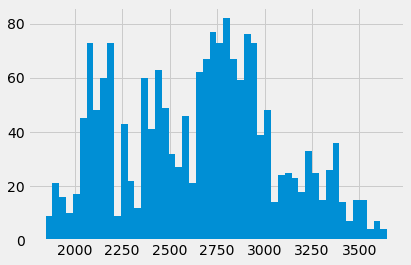

In [7]:
df.High.hist(bins=50)

We can't assume a uniform nor normal distribution in the plot above, because of that the statistical summary can helps us more, for this we will split the data into 10 chunks and compute mean and variance of each one.

In [8]:
np.round(df.shape[0]/10,0)

182.0

In [9]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df['High'].iloc[(i*182):(i*182)+182].mean())
    std.append(stdev(df['High'].iloc[(i*182):(i*182)+182]))

In [10]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,2019.354300,71.041024
1,2147.740282,36.287599
2,2322.969570,60.228422
3,2489.706581,55.878102
4,2711.253743,63.125935
5,2816.088946,68.351685
6,2754.165647,131.792411
7,2965.153137,74.059325
8,3045.669328,267.695412
9,3309.076588,165.733813


Above we see how both measures are clearly different in each chunk. However looking at the plot we could assume a constant variance as the ripple in the curve, but without a doubt trend is the most outstanding feature. Until now can assume it's a non-stationary serie, but to know more about it we will evaluate two other methods.  
Seasonal decomposition is a function from statsmodels library which allows us to decompose the serie into trend, seasonal and residual, either additive or multiplicative:

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

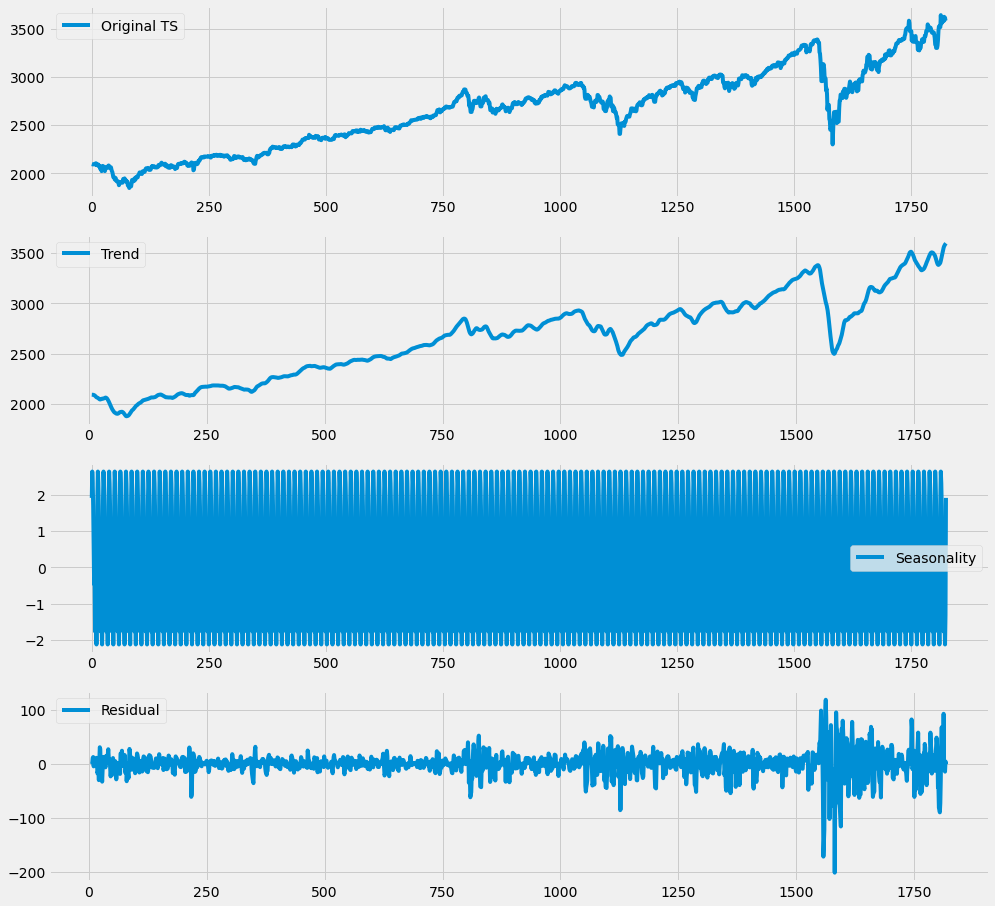

In [12]:
decompose_add=seasonal_decompose(df['High'], model='additive', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

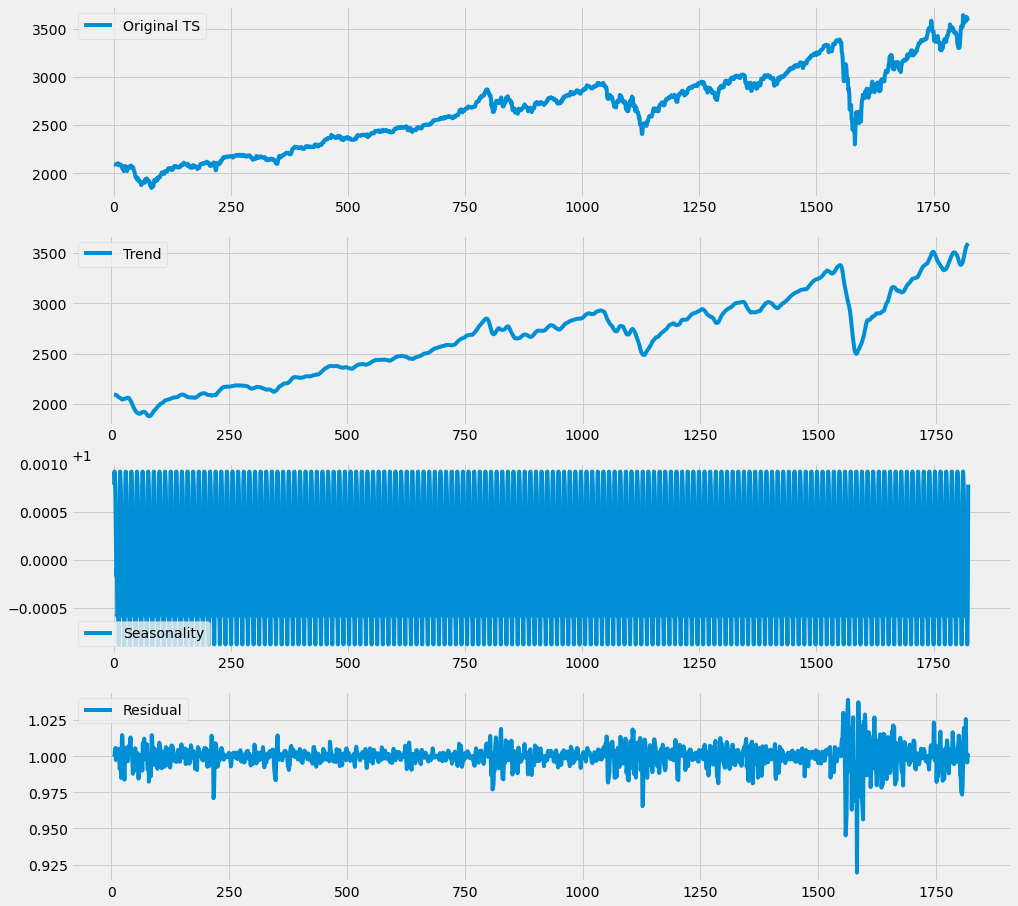

In [13]:
decompose_mul=seasonal_decompose(df['High'], model='multiplicative', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best')

Looking carefully to the original curve we can say the additive decomposition makes more sense as the trend does not seem to be changing by the multiplication with seasonal component, rather every component seems to being added up to create the original curve. Independent of this there is a trend and seasonal component.  
Below we can see the ACF and PACF plots:

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

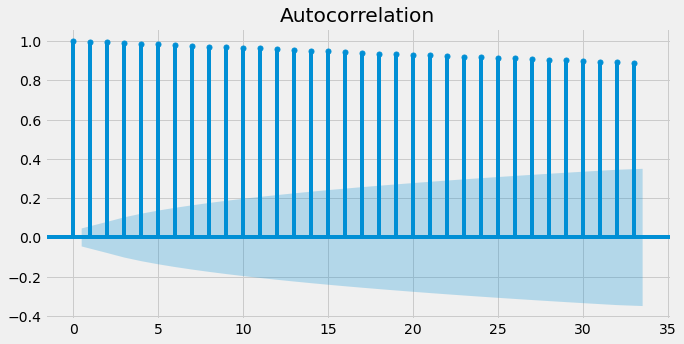

In [15]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['High'])
print()

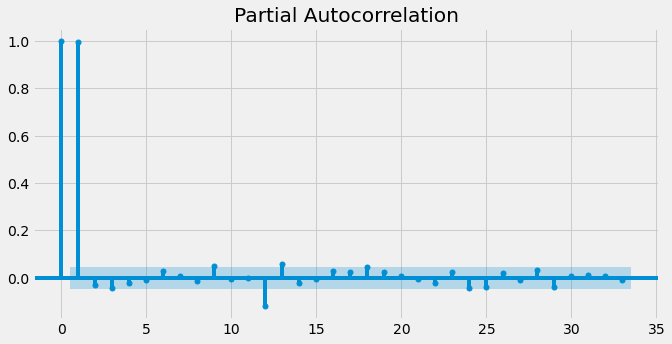

In [16]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['High'])
print()

Finally, we will make the Augmented Dickey-Fuller test, using 5% as significance level and declaring the following hypothesis:
- H0= Serie corresponds to non-stationary type.
- H1= Serie corresponds to stationary type.

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
result = adfuller(df['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.713598
p-value: 0.843196
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


As p-value is greater than 0.05 we fail to reject the null hypothesis, therefore there is not enough evidence to reject that we are working with a non-stationary series. Let's apply the log transformation to the serie and test again.

In [19]:
from numpy import log

result = adfuller(log(df['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.920468
p-value: 0.781157
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Based on every method applied we can endorse the serie clearly corresponds to a non-stationary type, which means that we have to convert this to stationary by using filters and complex transformations. However, deep learning approaches can lead us to build models which takes into account all of these characteristics and predict future values modestly, but as disadvantage it would take significantly more time to train such models

# Sentimental Analysis of news

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\admin\Downloads\djia_news copy.csv")
df.head()

,Label,Ticker,Headline
0,0,MMM,Employer who stole nearly $3M in wages from 15...
1,1,MMM,Huge new Facebook data leak exposed intimate d...
2,0,MMM,A campaign has accelerated to turn a disused r...
3,1,MMM,Google launches global human trafficking helpl...
4,1,MMM,Over 3m Saudi Women Don’t Have ID Cards; Saudi...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     2381 non-null   int64 
 1   Ticker    2381 non-null   object
 2   Headline  2381 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.9+ KB


For visualizing the sentiment distribution I'm using dija because :
1. it's small in size , so we can observe any pattern easily
2. it contains the best performers of market, we can get an overview of economy & industry from this index

In [4]:
#counting cumulative frequency of labels : 1 - positive , 0 - negative , 2- neutral
df.groupby(by='Ticker').count()

,Label,Headline
Ticker,,
AAAU,100,100
AAPL,100,100
ADME,100,100
AIQ,100,100
AMGN,12,12
AXP,80,80
BA,100,100
CAT,99,99
CCEP,100,100


Quite a large number of label valus , so we need answers for . 
1. Is there any duplicate headline ?
2. If there is duplicate,does market behave in a consistent manner when it encounters these headline ?

In [5]:
#separating unique & duplicate values , storing them in different dataframe
df_dup=df[df.duplicated('Headline',keep=False)].sort_values('Headline')
df_unique=df[~df.duplicated('Headline',keep=False)].sort_values('Headline')

In [6]:
# now counting number of sentiments(+ve,-ve and neutral) present for each & every stock of dija
df_unique.groupby(by=['Ticker','Label']).count()

Headline
Ticker Label          
AAAU   0            94
       1             3
AAPL   0            51
       1            35
       2             2
...                ...
WBA    0            28
       1            20
WMT    0            52
       1            39
       2             3

[67 rows x 1 columns]

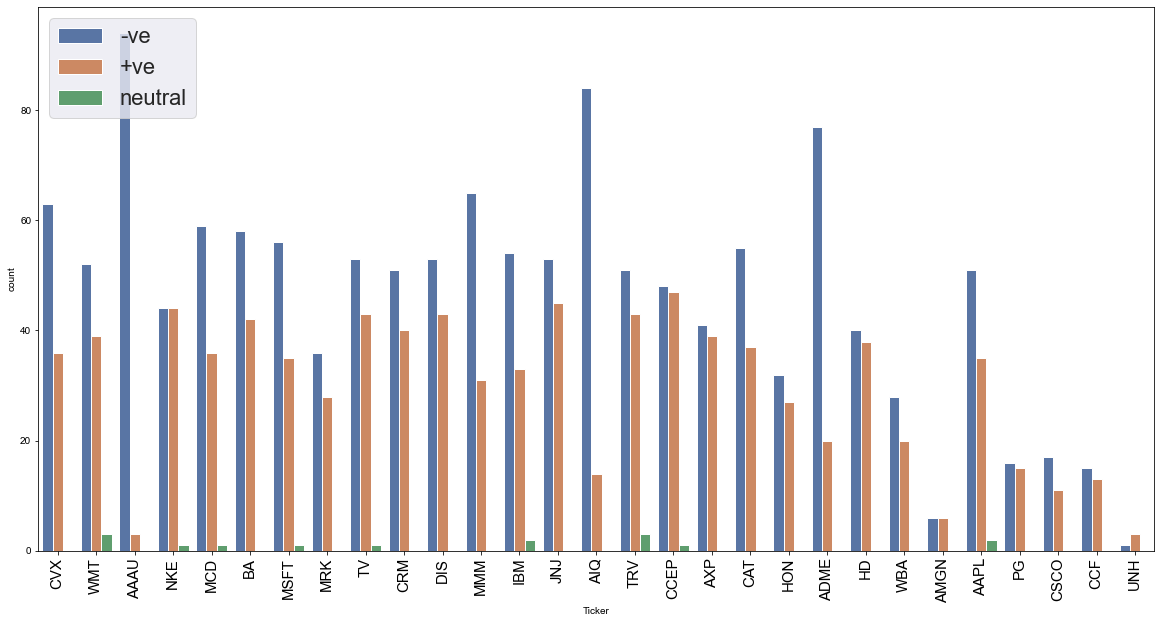

In [7]:
#plotting distribution of unique values
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.set(font_scale = 2)
plt.xticks(rotation=90,fontsize=15)
sns.countplot(x=df_unique['Ticker'],hue=df_unique['Label'])
ax.legend(['-ve','+ve','neutral'])
plt.show()

 Overall review
 -----------------------------------------------------------------------------------
**most of the stocks that showing predominantly -ve trend or bearish trend**<br>
**NKE,CCEP - very volatile i.e price fluctuating**<br>
**AAAU,AIQ,ADME - high -ve sentiment**<br>
**for rest of the stock - no high craze, but news is circulating & that is effecting buyer-seller sentiment (at a moderate rate)**

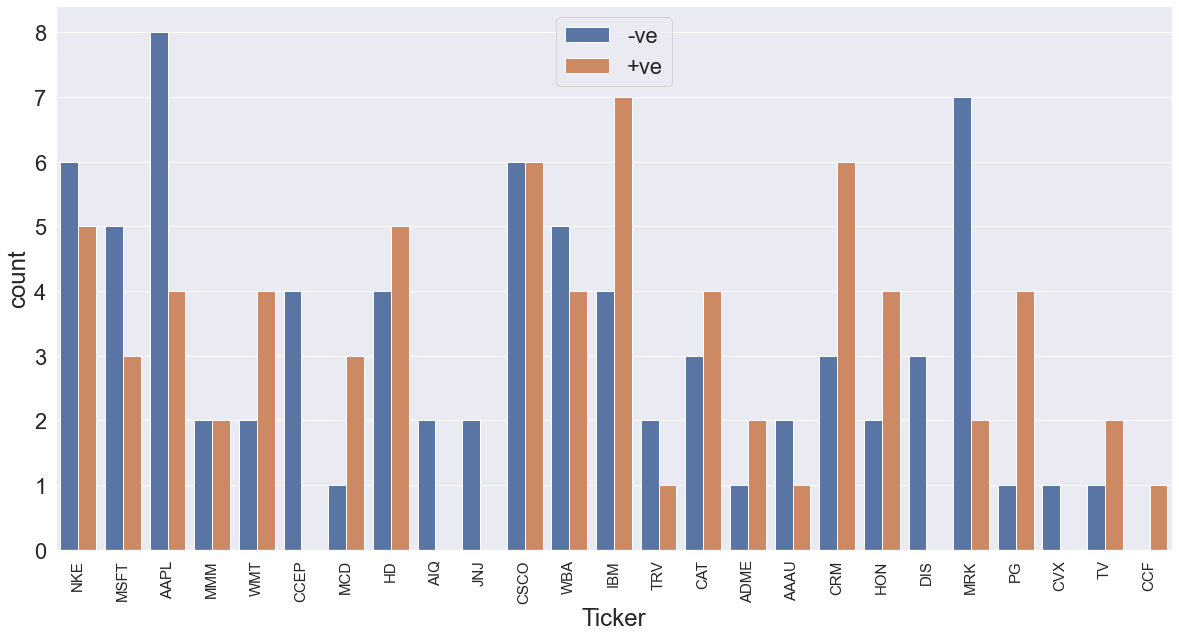

In [8]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.set(font_scale = 2)
plt.xticks(rotation=90,fontsize=15)
sns.countplot(x=df_dup['Ticker'],hue=df_dup['Label'])
ax.legend(['-ve','+ve'])
plt.show()

now this is interesting

what are the possible reasons of duplicate news/headline of the same stock?
1. different platform is taking news from same media house (similar sentiment)
2. diferent media house is trying to create dissimilar sentiment (price manipulation might be an intention , can say for sure) for the same stock

**Effect**:<br>
well market participants are showing bullish sentiment compared situations in previous case where participants got almost correct information (people are buying more when they are not sure about the market position)<br>

One thing to remember : This headlines were taken at different timestamp so same stock has behaved 
differently over the timespan<br>

Overal review
---------------
**market volatile , slightly bullish<br>
ANQ,JNJ showing -ve trend (exception)<br>
news circulation very limited i.e limited person has this news of somewhat sudden somewhat +ve trend/increase in volatility in market**

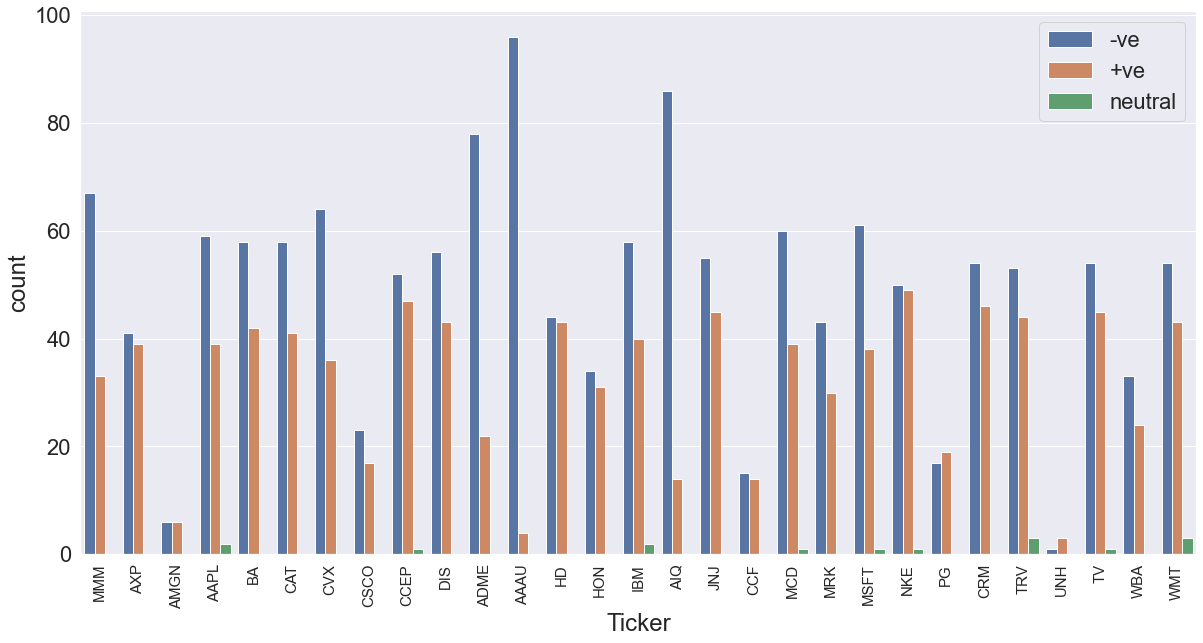

In [9]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.set(font_scale = 2)
plt.xticks(rotation=90,fontsize=15)
sns.countplot(x=df['Ticker'],hue=df['Label'])
ax.legend(['-ve','+ve','neutral'])
plt.show()

If someone is looking for volatility or scalping or intraday , these are the opportunities<br>
buy & sell both (scalping) - AXP,HD,HON,CCF,PG<br>
short sell(intraday) - AAAU,AIO,ADME<br>


In [10]:
#categorize each sentiments (+ve,-ve,neutral) for each stock
df=df.groupby(by=['Ticker','Label'])['Headline'].apply(' '.join).reset_index()

In [11]:
from wordcloud import WordCloud, STOPWORDS

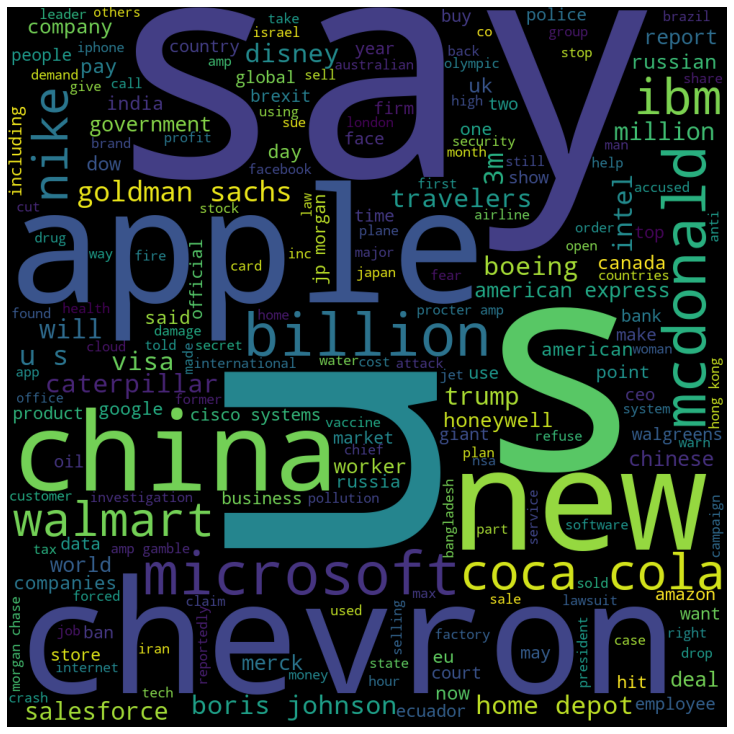

In [12]:
# let's check which words are causing havoc or creating opportunity
comment_words = ''
stopwords = set(STOPWORDS)

for val in df['Headline'].str.lower():
    tokens = val.split()
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 1000, height = 1000,background_color ='black',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
 
                     
plt.figure(figsize = (10,12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# THANK YOU !